### Name : Prajyot Gorlewar
### Roll no: B47

# CAPTCHA Recognition using CNN


## Import Libraries

In [43]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import string

## Load the Dataset

In [ ]:
data_dir = 'samples' 
characters = string.ascii_letters + string.digits
n_chars = 5
n_classes = len(characters)

X = []
y = [[] for _ in range(n_chars)]

for filename in os.listdir(data_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):
        label = os.path.splitext(filename)[0]
        if len(label) != n_chars: continue
        img_path = os.path.join(data_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (160, 60))
        X.append(img / 255.0)
        for i, char in enumerate(label):
            y[i].append(characters.index(char))

X = np.array(X)
y = [to_categorical(np.array(label), num_classes=n_classes) for label in y]

## Split Dataset

In [ ]:

y = [np.array(label) for label in y]

indices = np.arange(len(X))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)

X_train, X_test = X[train_idx], X[test_idx]
y_train = [label[train_idx] for label in y]
y_test = [label[test_idx] for label in y]


## Compile Model

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(60, 160, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)

outputs = [Dense(n_classes, activation='softmax', name=f'char_{i}')(x) for i in range(n_chars)]

model = Model(inputs=input_layer, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] * n_chars 
)



## Train model

In [ ]:

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=10,
    validation_data=(X_test, y_test)
)


Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - char_0_accuracy: 0.0482 - char_0_loss: 3.8144 - char_1_accuracy: 0.0450 - char_1_loss: 3.9306 - char_2_accuracy: 0.0265 - char_2_loss: 3.8752 - char_3_accuracy: 0.0395 - char_3_loss: 3.9749 - char_4_accuracy: 0.0439 - char_4_loss: 3.8005 - loss: 19.3959 - val_char_0_accuracy: 0.1495 - val_char_0_loss: 2.9301 - val_char_1_accuracy: 0.0514 - val_char_1_loss: 2.9486 - val_char_2_accuracy: 0.1028 - val_char_2_loss: 2.9757 - val_char_3_accuracy: 0.1028 - val_char_3_loss: 3.0847 - val_char_4_accuracy: 0.1028 - val_char_4_loss: 2.9220 - val_loss: 14.8610
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - char_0_accuracy: 0.1780 - char_0_loss: 2.6844 - char_1_accuracy: 0.1644 - char_1_loss: 2.7270 - char_2_accuracy: 0.1335 - char_2_loss: 2.8455 - char_3_accuracy: 0.1192 - char_3_loss: 2.9033 - char_4_accuracy: 0.1253 - char_4_loss: 2.8064 - loss: 13.9667 - val_char_0_accuracy: 0.3364 - val_char_0_loss: 2.1082 - val_char_1_accuracy: 0.2617 

## Predict and visualize

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted: m33b3


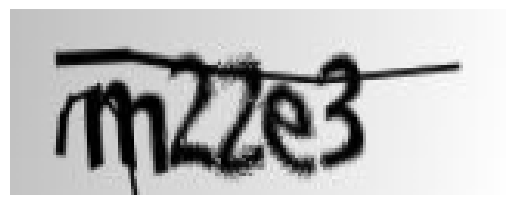

Predicted: 7gn73


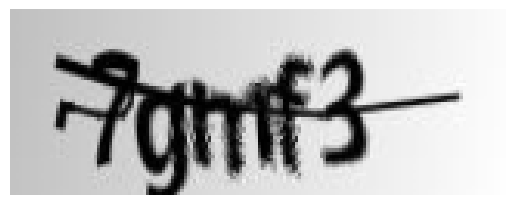

Predicted: xf447


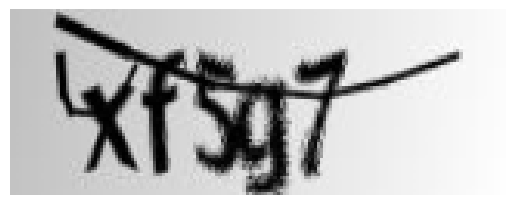

In [89]:
preds = model.predict(X_test[:10])
for i in range(3):
    plt.imshow(X_test[i+5])
    plt.axis('off')
    pred_text = ''.join([characters[np.argmax(p[i+5])] for p in preds])
    print(f'Predicted: {pred_text}')
    plt.show()